<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Catalan array $\mathcal{C}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

init_printing()

In [2]:
%run ../../src/matrix_functions.py

# Catalan array $\mathcal{C}$

In [7]:
m=8

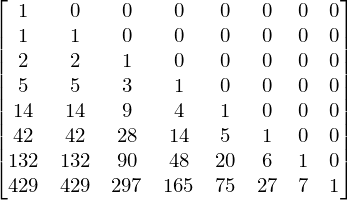

In [8]:
C = Matrix(m, m, lambda n,k: (k+1)*binomial(2*n-k, n-k)/(n+1) if n > 0 else int(not k))
C

In [9]:
data, eigenvals, multiplicities = eigendata = eigen_data(C)
eigendata

In [10]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

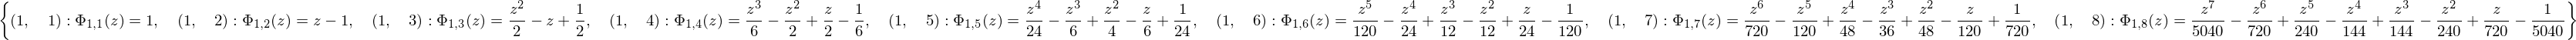

In [11]:
Phi_polynomials = component_polynomials_riordan(m)
Phi_polynomials

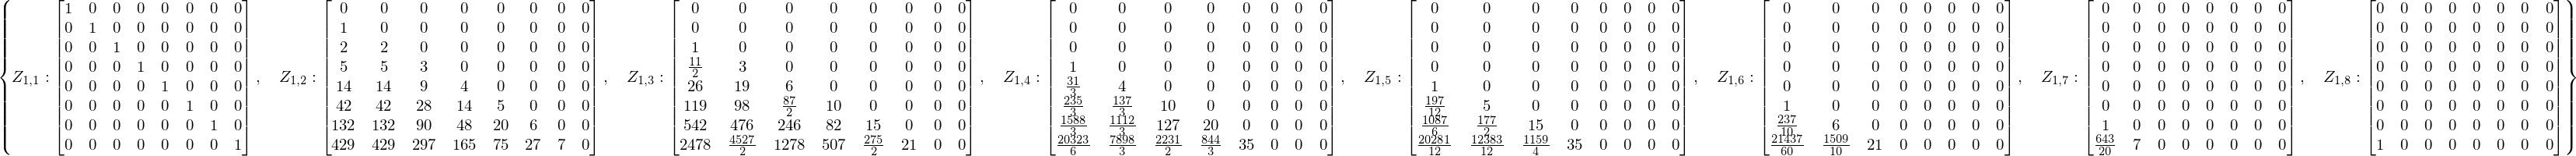

In [12]:
Z = IndexedBase('Z')
cmatrices = component_matrices(C, Phi_polynomials)
{Z[k]:v for k,v in cmatrices.items()}

## `inverse` function

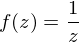

In [14]:
f = Function('f')
f_inverse = define(let=f(z), be=1/z)
f_inverse

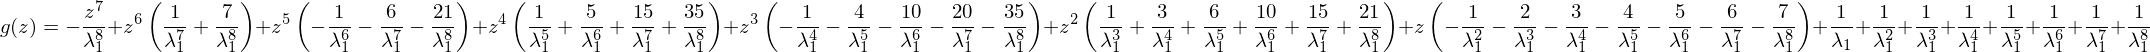

In [20]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [21]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

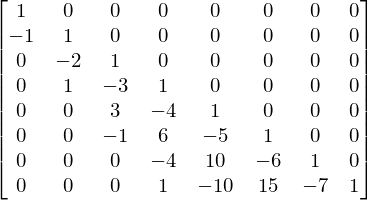

In [22]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    C_inverse = g_inverse(C)
C_inverse

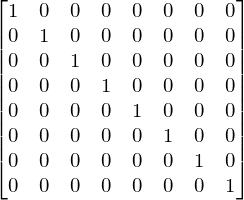

In [23]:
C_inverse*C

## `power` function

In [24]:
f, h = Function('f'), Function('h')
f_power = define(let=f(z), be=z**r)
f_power

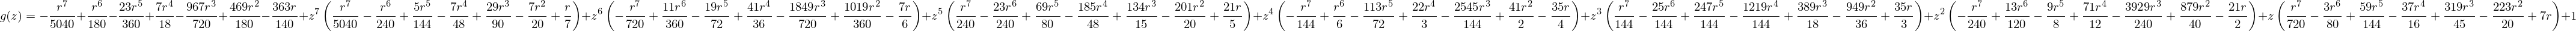

In [25]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power = g_power.subs(eigenvals)
g_power

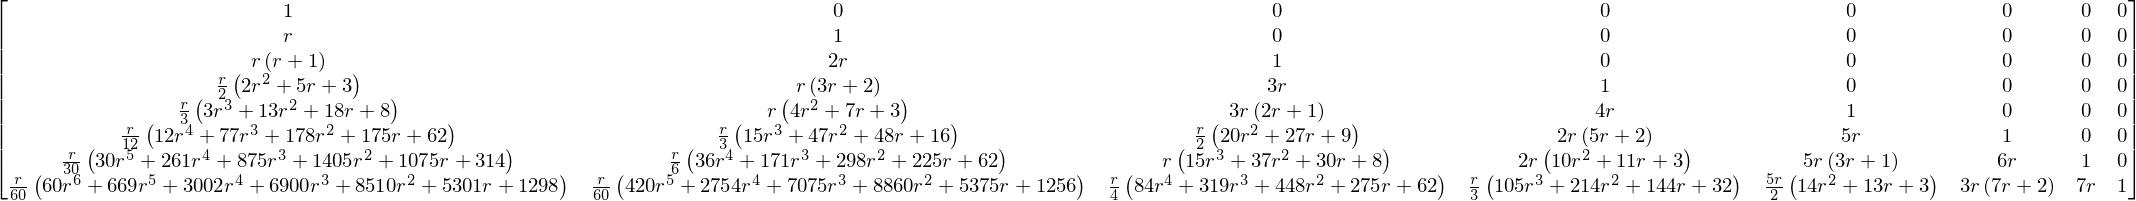

In [26]:
with lift_to_matrix_function(g_power) as g_power:
    C_power = g_power(C)
C_power

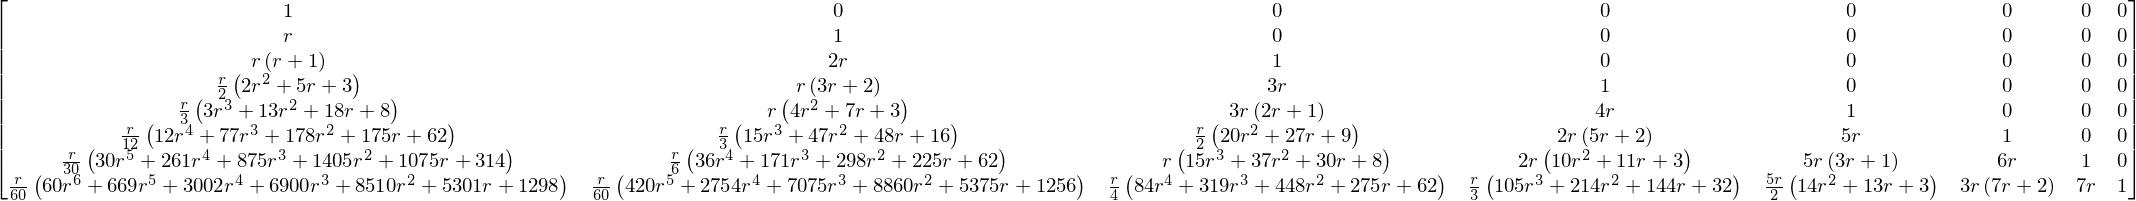

In [28]:
(C**r).applyfunc(simplify)

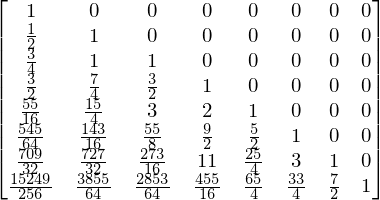

In [30]:
C_power.subs({r:S(1)/2})

## `sqrt` function

In [31]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

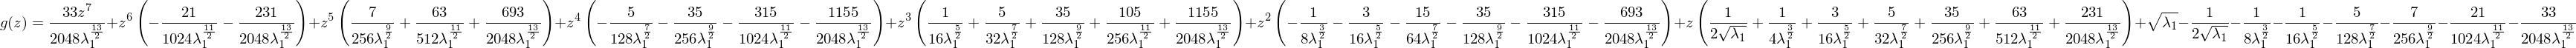

In [32]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

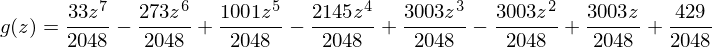

In [33]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

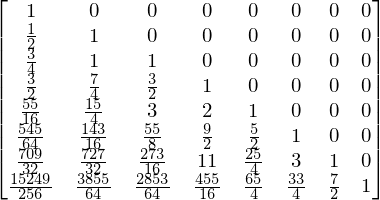

In [34]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    C_sqrt = g_sqrt(C)
C_sqrt

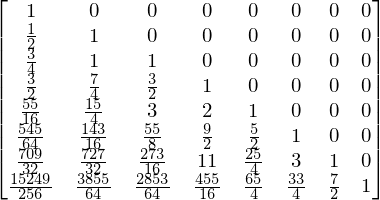

In [35]:
C**(S(1)/2)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.